# Project 7 (Chapter 6 ) Statistical Testing

In [44]:
import numpy as np
import pandas as pd

mutual_fund_data = pd.read_csv("Top100MutualFunds.csv")
mutual_fund_data

,Symbol,Name,Category1,Category2,Category3,Morningstar Category,Morningstar Rating,Market cap,Current yield,Fees,Action
0,AGTHX,American Funds The Growth Fund of America Class A,US Equity,Broad market,Large cap,Large Growth,3.0,"$138,592,080,000",0.22%,0.62%,Analyze
1,FCNTX,Fidelity Contrafund Fund,US Equity,Broad market,Large cap,Large Growth,3.0,"$121,762,870,000",0.00%,0.74%,Analyze
2,CWMAX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.46%,0.63%,Analyze
3,CWMCX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",0.79%,1.40%,Analyze
4,CWMEX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.28%,0.87%,Analyze
...,...,...,...,...,...,...,...,...,...,...,...
95,FDTRX,Franklin DynaTech Fund Class R6,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.51%,Analyze
96,FDYZX,Franklin DynaTech Fund Advisor Class,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.62%,Analyze
97,BBVLX,Bridge Builder Large Cap Value Fund,US Equity,Broad market,Large cap,Large Value,4.0,"$9,500,000,000",1.55%,0.25%,Analyze
98,PEYAX,Putnam Large Cap Value Fund Class A,US Equity,Broad market,Large cap,Large Value,4.0,"$9,393,340,000",1.23%,0.91%,Analyze


In [45]:
import pandas_datareader.data as web
import yfinance as yf
from datetime import datetime

mutual_fund_dict = {}
symbols = list(mutual_fund_data["Symbol"])
start = datetime(1980, 1, 1)
end = datetime(2020, 1, 1)
(start, end, symbols)

(datetime.datetime(1980, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 1, 0, 0),
 ['AGTHX',
  'FCNTX',
  'CWMAX',
  'CWMCX',
  'CWMEX',
  'CWMFX',
  'AIVSX',
  'AWSHX',
  'ANCFX',
  'AMCFX',
  'CAFAX',
  'CAFCX',
  'CAFEX',
  'CAFFX',
  'FMACX',
  'TRBCX',
  'AFMFX',
  'AMRFX',
  'CMLAX',
  'CMLCX',
  'CMLEX',
  'CMLFX',
  'FDGRX',
  'FBGRX',
  'AMCPX',
  'EAGRX',
  'AMRMX',
  'FMAGX',
  'HACAX',
  'FLPSX',
  'PRGFX',
  'PRNHX',
  'DFQTX',
  'DFEOX',
  'FLPKX',
  'RPMGX',
  'FOCPX',
  'CNGAX',
  'CNGCX',
  'CNGEX',
  'CNGFX',
  'FNEFX',
  'FOCKX',
  'DFLVX',
  'CDDRX',
  'CDDYX',
  'CDIRX',
  'CVIRX',
  'TWCUX',
  'EGFFX',
  'EGFIX',
  'ANEFX',
  'HLIEX',
  'FRDPX',
  'FRDAX',
  'FRDRX',
  'FRISX',
  'PRHSX',
  'PRILX',
  'DDFIX',
  'DDFRX',
  'VAFAX',
  'PCBIX',
  'FCGAX',
  'FGSRX',
  'FIFRX',
  'PRFDX',
  'PRBLX',
  'JVMIX',
  'VWNFX',
  'FKGRX',
  'PRDGX',
  'AULDX',
  'AULGX',
  'AULNX',
  'AULRX',
  'AULYX',
  'AKRSX',
  'MFEIX',
  'POLIX',
  'FKDNX',
  'MADVX',
  'VWUSX',
  'LSGRX',


In [46]:
yf.pdr_override()
fund_data = web.get_data_yahoo(symbols, start, end)
fund_data

[*********************100%%**********************]  100 of 100 completed

1 Failed download:
['EAGRX']: Exception("%ticker%: Data doesn't exist for startDate = 315550800, endDate = 1577854800")


Price       Adj Close                                                         \
Ticker          AFMFX      AGTHX      AIVSX      AKRIX      AKRSX      AMCFX   
Date                                                                           
1980-01-02        NaN   0.599009        NaN        NaN        NaN        NaN   
1980-01-03        NaN   0.609457        NaN        NaN        NaN        NaN   
1980-01-04        NaN   0.609457        NaN        NaN        NaN        NaN   
1980-01-07        NaN   0.625129        NaN        NaN        NaN        NaN   
1980-01-08        NaN   0.632094        NaN        NaN        NaN        NaN   
...               ...        ...        ...        ...        ...        ...   
2019-12-24  36.736088  40.456985  32.380348  39.849663  40.053387  27.291409   
2019-12-26  36.820663  40.662514  32.519531  39.963570  40.167400  27.380096   
2019-12-27  36.846035  40.654610  32.519531  40.016140  40.220020  27.372032   
2019-12-30  36.702259  40.298893  32.298473  39.875950  40.070927  27.194658   
2019-12-31  36.786839  40.417465  32.396721  39.963570  40.167400  27.259161   

Price                                                   ... Volume        \
Ticker          AMCPX      AMRFX      AMRMX      ANCFX  ...  PRNHX RPMGX   
Date                                                    ...                
1980-01-02        NaN        NaN        NaN   0.683940  ...      0   NaN   
1980-01-03        NaN        NaN        NaN   0.680125  ...      0   NaN   
1980-01-04        NaN        NaN        NaN   0.690618  ...      0   NaN   
1980-01-07        NaN        NaN        NaN   0.693479  ...      0   NaN   
1980-01-08        NaN        NaN        NaN   0.710649  ...      0   NaN   
...               ...        ...        ...        ...  ...    ...   ...   
2019-12-24  27.186573  36.895542  37.228836  48.387196  ...      0   0.0   
2019-12-26  27.275551  36.980484  37.314503  48.605896  ...      0   0.0   
2019-12-27  27.259375  37.005955  37.340199  48.652760  ...      0   0.0   
2019-12-30  27.081419  36.861576  37.194572  48.316898  ...      0   0.0   
2019-12-31  27.154217  36.946507  37.280239  48.441868  ...      0   0.0   

Price                                                       
Ticker     SBLYX SEEGX TRBCX TWCGX TWCUX VAFAX VWNFX VWUSX  
Date                                                        
1980-01-02   NaN   NaN   NaN     0   NaN   NaN   NaN     0  
1980-01-03   NaN   NaN   NaN     0   NaN   NaN   NaN     0  
1980-01-04   NaN   NaN   NaN     0   NaN   NaN   NaN     0  
1980-01-07   NaN   NaN   NaN     0   NaN   NaN   NaN     0  
1980-01-08   NaN   NaN   NaN     0   NaN   NaN   NaN     0  
...          ...   ...   ...   ...   ...   ...   ...   ...  
2019-12-24   0.0   0.0   0.0     0   0.0   0.0   0.0     0  
2019-12-26   0.0   0.0   0.0     0   0.0   0.0   0.0     0  
2019-12-27   0.0   0.0   0.0     0   0.0   0.0   0.0     0  
2019-12-30   0.0   0.0   0.0     0   0.0   0.0   0.0     0  
2019-12-31   0.0   0.0   0.0     0   0.0   0.0   0.0     0  

[10087 rows x 600 columns]

In [47]:
# .dropna(how = "all", axis = 1)-- remove any column that has only nan observations
close_data = fund_data["Adj Close"].dropna(how = "all", axis = 1)
close_data.tail()

Ticker,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,PRNHX,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-24,36.736088,40.456985,32.380348,39.849663,40.053387,27.291409,27.186573,36.895542,37.228836,48.387196,...,42.597168,75.295692,38.965019,32.529133,102.683052,28.506138,41.435978,14.698990,27.681654,36.163040
2019-12-26,36.820663,40.662514,32.519531,39.963570,40.167400,27.380096,27.275551,36.980484,37.314503,48.605896,...,42.654209,75.366707,39.279427,32.744980,103.558846,28.757086,41.826435,14.812882,27.788210,36.432034
2019-12-27,36.846035,40.654610,32.519531,40.016140,40.220020,27.372032,27.259375,37.005955,37.340199,48.652760,...,42.504475,75.287804,39.257984,32.720997,103.624939,28.741404,41.802525,14.819583,27.788210,36.398407
2019-12-30,36.702259,40.298893,32.298473,39.875950,40.070927,27.194658,27.081419,36.861576,37.194572,48.316898,...,42.190731,75.003761,38.929291,32.409218,102.666527,28.513985,41.459881,14.698990,27.643602,36.045353
2019-12-31,36.786839,40.417465,32.396721,39.963570,40.167400,27.259161,27.154217,36.946507,37.280239,48.441868,...,42.333340,75.216789,39.022182,32.481171,102.740875,28.568878,41.563473,14.732488,27.712099,36.163040


In [48]:
close_data["S&P 500"] = web.get_data_yahoo("^GSPC", start, end)["Adj Close"]
close_data.tail()

[*********************100%%**********************]  1 of 1 completed


Ticker,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-24,36.736088,40.456985,32.380348,39.849663,40.053387,27.291409,27.186573,36.895542,37.228836,48.387196,...,75.295692,38.965019,32.529133,102.683052,28.506138,41.435978,14.698990,27.681654,36.163040,3223.379883
2019-12-26,36.820663,40.662514,32.519531,39.963570,40.167400,27.380096,27.275551,36.980484,37.314503,48.605896,...,75.366707,39.279427,32.744980,103.558846,28.757086,41.826435,14.812882,27.788210,36.432034,3239.909912
2019-12-27,36.846035,40.654610,32.519531,40.016140,40.220020,27.372032,27.259375,37.005955,37.340199,48.652760,...,75.287804,39.257984,32.720997,103.624939,28.741404,41.802525,14.819583,27.788210,36.398407,3240.020020
2019-12-30,36.702259,40.298893,32.298473,39.875950,40.070927,27.194658,27.081419,36.861576,37.194572,48.316898,...,75.003761,38.929291,32.409218,102.666527,28.513985,41.459881,14.698990,27.643602,36.045353,3221.290039
2019-12-31,36.786839,40.417465,32.396721,39.963570,40.167400,27.259161,27.154217,36.946507,37.280239,48.441868,...,75.216789,39.022182,32.481171,102.740875,28.568878,41.563473,14.732488,27.712099,36.163040,3230.780029


In [49]:
rolling4wk = np.log(close_data).diff(20)
rolling4wk

Ticker,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,0.024164,0.034020,0.034136,0.007483,0.007672,0.038170,0.037893,0.023893,0.023820,0.030728,...,0.024472,0.028295,0.035356,0.026003,0.027354,0.031897,0.038054,0.022869,0.031784,0.028235
2019-12-26,0.024414,0.038144,0.038425,0.007330,0.007518,0.039655,0.039387,0.024371,0.024069,0.035553,...,0.021245,0.034175,0.037708,0.031702,0.032913,0.036720,0.042681,0.028776,0.034366,0.031157
2019-12-27,0.023058,0.032500,0.033954,0.007144,0.007333,0.034100,0.033784,0.023015,0.022713,0.032428,...,0.015743,0.027543,0.031396,0.026287,0.027578,0.029728,0.036104,0.025680,0.027267,0.027025


<Axes: xlabel='Date'>

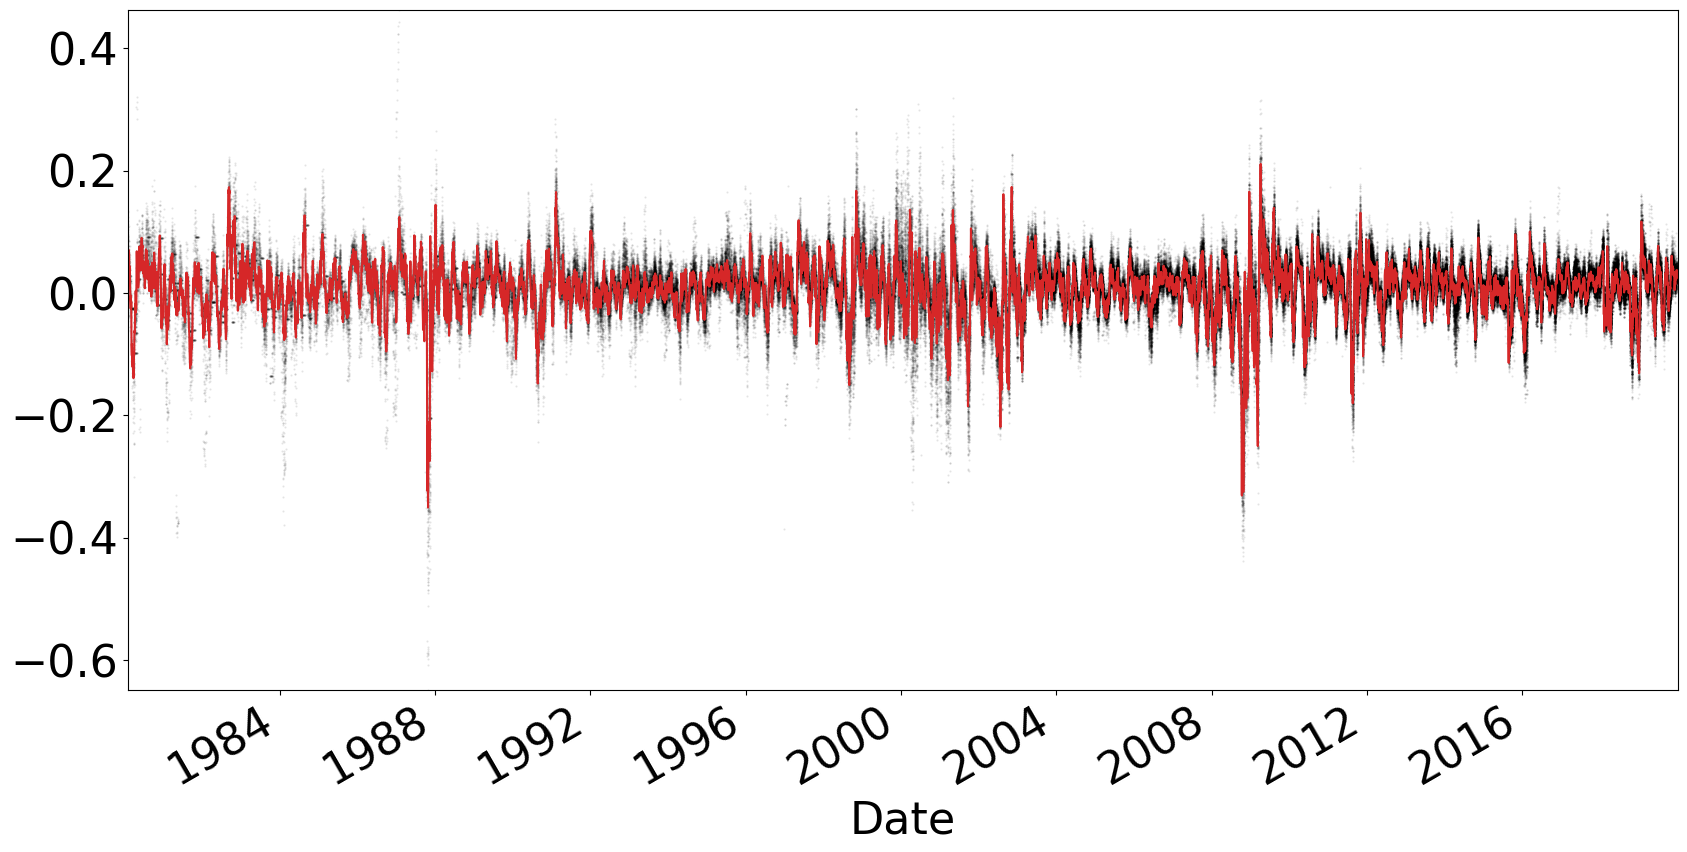

In [50]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (20,10))
rolling4wk.plot(ls = "", marker = ".", ax = ax, 
                color = "k", markersize = 1, 
                alpha = .1, legend = False)
rolling4wk["S&P 500"].plot.line(color = "C3",
                                ax = ax, legend = False)

In [51]:
monthly_close_data = close_data.resample("M").first()
monthly_close_data.tail()

Ticker,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-31,33.871078,36.979725,29.554478,38.182529,38.358761,24.858330,24.781279,34.036892,34.372856,43.642975,...,71.281807,36.324135,30.439293,96.351395,26.170855,37.630039,13.367850,25.018570,33.481194,2953.560059
2019-09-30,33.927956,36.072559,29.034613,38.999451,39.176540,24.341730,24.262257,34.085896,34.422333,42.655293,...,69.934196,35.322327,30.333427,94.342865,25.673565,36.660069,13.186357,24.397642,32.819004,2906.270020
2019-10-31,34.371723,35.932434,29.205879,38.403778,38.588764,24.218363,24.138313,34.530262,34.861313,43.182724,...,69.312782,35.451813,29.310080,92.877640,25.643881,36.851006,13.086224,24.955780,32.390995,2940.250000
2019-11-30,35.188931,37.820507,30.358839,39.246223,39.432091,25.374924,25.284805,35.351242,35.681480,45.444614,...,71.581276,36.855713,30.008778,96.573639,26.772057,38.829128,13.774641,26.295313,33.820370,3066.909912
2019-12-31,35.654751,38.801422,31.036596,39.161129,39.355427,26.084284,25.989742,35.810982,36.137123,46.479450,...,73.086128,37.625809,31.123873,99.257164,27.536551,40.012936,14.081302,26.727875,34.773285,3113.870117


In [52]:
monthly_close_data.index

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=480, freq='M')

In [53]:
monthly_returns = np.log(monthly_close_data).diff()
monthly_returns.tail()

Ticker,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-31,-0.005503,-0.012486,-0.008626,0.016176,0.016344,-0.015695,-0.016124,-0.005742,-0.005979,-0.009414,...,-0.004088,0.003006,0.005347,-0.000598,0.006259,0.001625,0.002813,-0.005562,-0.003611,-0.003640
2019-09-30,0.001678,-0.024837,-0.017747,0.021169,0.021095,-0.021001,-0.021167,0.001439,0.001438,-0.022891,...,-0.019086,-0.027967,-0.003484,-0.021066,-0.019185,-0.026115,-0.013670,-0.025132,-0.019976,-0.016141
2019-10-31,0.012995,-0.003892,0.005881,-0.015392,-0.015117,-0.005081,-0.005122,0.012952,0.012672,0.012289,...,-0.008925,0.003659,-0.034319,-0.015653,-0.001157,0.005195,-0.007623,0.022619,-0.013127,0.011624
2019-11-30,0.023497,0.051211,0.038718,0.021699,0.021619,0.046650,0.046403,0.023497,0.023254,0.051054,...,0.032204,0.038836,0.023558,0.039023,0.043054,0.052288,0.051269,0.052285,0.043183,0.042176
2019-12-31,0.013151,0.025605,0.022079,-0.002171,-0.001946,0.027572,0.027498,0.012921,0.012689,0.022516,...,0.020805,0.020680,0.036485,0.027408,0.028156,0.030032,0.022019,0.016316,0.027786,0.015196


In [54]:
avg_monthly_return = monthly_returns.loc["2012":].dropna(axis = 1)
avg_monthly_return.mean(axis = 1)

Date
2012-01-31    0.014721
2012-02-29    0.047623
2012-03-31    0.039693
2012-04-30    0.029513
2012-05-31   -0.007627
                ...   
2019-08-31   -0.003797
2019-09-30   -0.015326
2019-10-31    0.000613
2019-11-30    0.037574
2019-12-31    0.021969
Freq: M, Length: 96, dtype: float64

In [55]:
avg_monthly_return.describe()

Ticker,AGTHX,AIVSX,AKRIX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,ANEFX,AULRX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,...,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,0.011447,0.009989,0.013689,0.010963,0.010819,0.009664,0.009531,0.010579,0.011577,0.011749,...,0.011749,0.013148,0.011953,0.013189,0.011310,0.012165,0.010962,0.009649,0.013310,0.009553
std,0.036691,0.033476,0.033598,0.035294,0.035264,0.028719,0.028705,0.034874,0.037393,0.040056,...,0.036906,0.036722,0.041844,0.040958,0.038004,0.040086,0.042603,0.035871,0.041346,0.035163
min,-0.101664,-0.089370,-0.079880,-0.098326,-0.098368,-0.081291,-0.081291,-0.102798,-0.096428,-0.110194,...,-0.107377,-0.100294,-0.116103,-0.113944,-0.104932,-0.109935,-0.123106,-0.102655,-0.117431,-0.105880
25%,-0.004988,-0.006103,-0.002351,-0.005928,-0.006328,-0.001976,-0.002043,-0.004263,-0.005085,-0.004297,...,-0.004915,-0.005018,-0.008039,-0.003974,-0.004727,-0.004061,-0.008611,-0.008221,-0.010280,-0.003845
50%,0.015812,0.017611,0.017725,0.016136,0.015742,0.015253,0.015142,0.017100,0.015717,0.014404,...,0.013378,0.019315,0.015007,0.013572,0.014468,0.014809,0.012009,0.015723,0.017904,0.017413
75%,0.032966,0.029742,0.034420,0.032072,0.031807,0.028157,0.027912,0.028863,0.035051,0.034014,...,0.036979,0.035330,0.040195,0.040666,0.035013,0.034609,0.036249,0.032824,0.035474,0.031406
max,0.087401,0.094290,0.079932,0.082333,0.082298,0.081777,0.081480,0.096815,0.094370,0.099527,...,0.104650,0.089317,0.104325,0.102334,0.092394,0.100201,0.100113,0.082084,0.114323,0.089551


<Axes: xlabel='Date'>

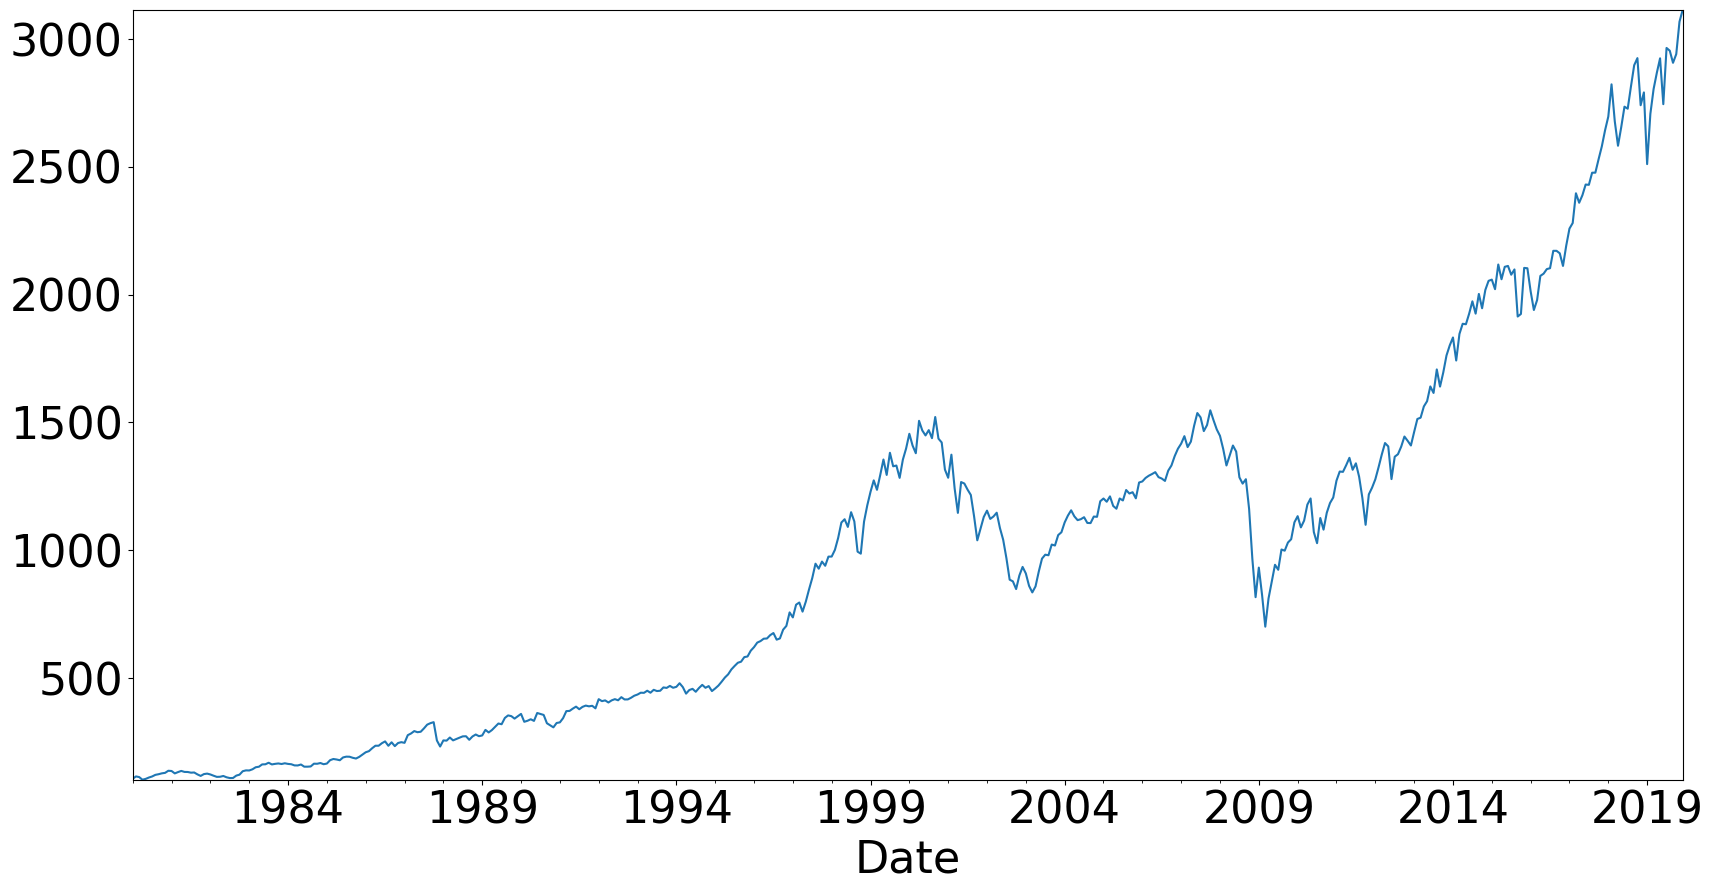

In [56]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (20,10))
monthly_close_data["S&P 500"].plot.line(ax = ax)

In [64]:
mu = monthly_returns.mean()
mu

Ticker
AFMFX      0.008467
AGTHX      0.008708
AIVSX      0.007065
AKRIX      0.012940
AKRSX      0.014000
             ...   
TWCUX      0.009303
VAFAX      0.007559
VWNFX      0.008301
VWUSX      0.006566
S&P 500    0.007061
Length: 100, dtype: float64

In [57]:
sigma = monthly_returns.std()
sigma

Ticker
AFMFX      0.028239
AGTHX      0.048214
AIVSX      0.040004
AKRIX      0.033775
AKRSX      0.033410
             ...   
TWCUX      0.060746
VAFAX      0.048225
VWNFX      0.043712
VWUSX      0.058541
S&P 500    0.044310
Length: 100, dtype: float64

In [58]:
sigma / np.sqrt(monthly_returns.shape[0])

Ticker
AFMFX      0.001289
AGTHX      0.002201
AIVSX      0.001826
AKRIX      0.001542
AKRSX      0.001525
             ...   
TWCUX      0.002773
VAFAX      0.002201
VWNFX      0.001995
VWUSX      0.002672
S&P 500    0.002022
Length: 100, dtype: float64

In [59]:
monthly_returns.sem()

Ticker
AFMFX      0.004773
AGTHX      0.002203
AIVSX      0.001983
AKRIX      0.003033
AKRSX      0.004678
             ...   
TWCUX      0.002838
VAFAX      0.003656
VWNFX      0.002148
VWUSX      0.002675
S&P 500    0.002025
Length: 100, dtype: float64

<Axes: ylabel='Frequency'>

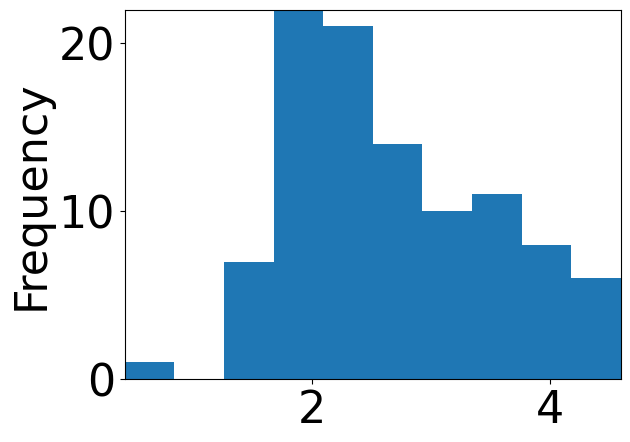

In [60]:
t_stats = monthly_returns.mean() / monthly_returns.sem()
t_stats.plot.hist()

Text(0.5, 1.0, 'Index Returns Relative to Market Return')

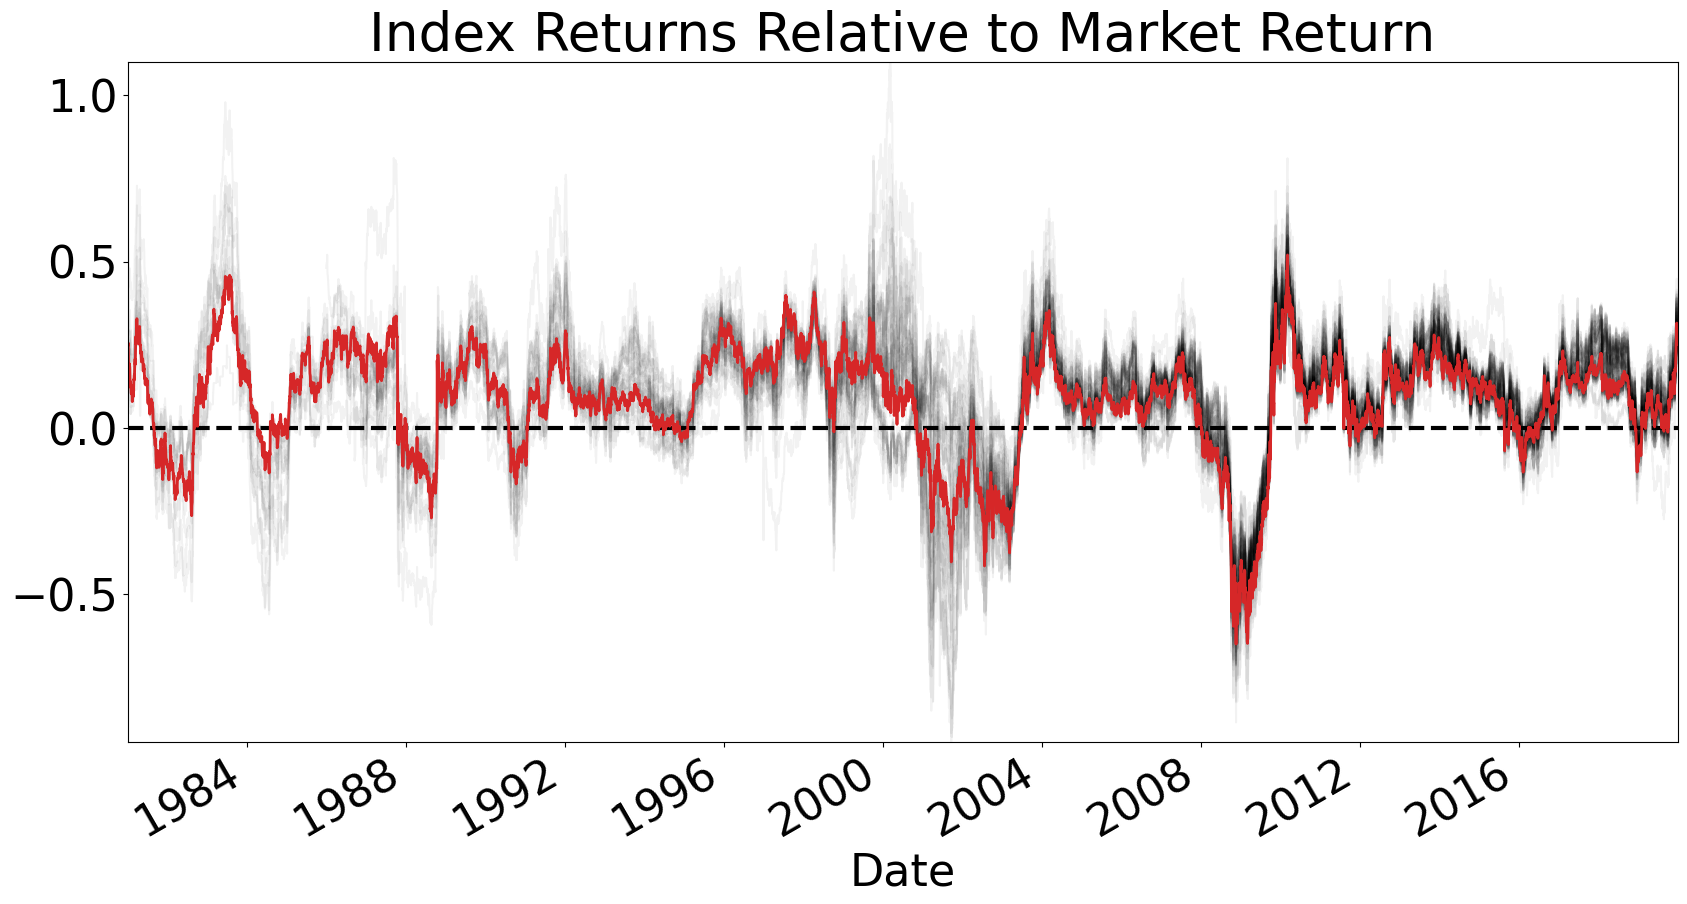

In [61]:
import matplotlib.pyplot as plt
plt.rcParams["axes.xmargin"] = 0
plt.rcParams["axes.ymargin"] = 0
days_per_year = 251
yoy_return = np.log(close_data).diff(days_per_year)
fig, ax = plt.subplots(figsize = (20,10))
yoy_return.plot.line(legend = False, color = "k", alpha = 0.05, ax = ax)
ax.axhline(0, ls = "--", color = "k", linewidth = 3)
yoy_return["S&P 500"].plot.line(color = "C3", linewidth = 2, ax = ax)
plt.rcParams.update({"font.size": 32})
ax.set_title("Index Returns Relative to Market Return")

In [62]:
close_data

Ticker,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-02,NaN,0.599009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.683940,...,NaN,NaN,NaN,NaN,0.328262,NaN,NaN,NaN,1.497638,105.760002
1980-01-03,NaN,0.609457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.680125,...,NaN,NaN,NaN,NaN,0.320711,NaN,NaN,NaN,1.497638,105.220001
1980-01-04,NaN,0.609457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.690618,...,NaN,NaN,NaN,NaN,0.285476,NaN,NaN,NaN,1.497638,106.519997
1980-01-07,NaN,0.625129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.693479,...,NaN,NaN,NaN,NaN,0.290510,NaN,NaN,NaN,1.497638,106.809998
1980-01-08,NaN,0.632094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.710649,...,NaN,NaN,NaN,NaN,0.297341,NaN,NaN,NaN,1.497638,108.949997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,36.736088,40.456985,32.380348,39.849663,40.053387,27.291409,27.186573,36.895542,37.228836,48.387196,...,75.295692,38.965019,32.529133,102.683052,28.506138,41.435978,14.698990,27.681654,36.163040,3223.379883
2019-12-26,36.820663,40.662514,32.519531,39.963570,40.167400,27.380096,27.275551,36.980484,37.314503,48.605896,...,75.366707,39.279427,32.744980,103.558846,28.757086,41.826435,14.812882,27.788210,36.432034,3239.909912
2019-12-27,36.846035,40.654610,32.519531,40.016140,40.220020,27.372032,27.259375,37.005955,37.340199,48.652760,...,75.287804,39.257984,32.720997,103.624939,28.741404,41.802525,14.819583,27.788210,36.398407,3240.020020


Text(0.5, 1.0, 'Index Returns Relative to Market Return')

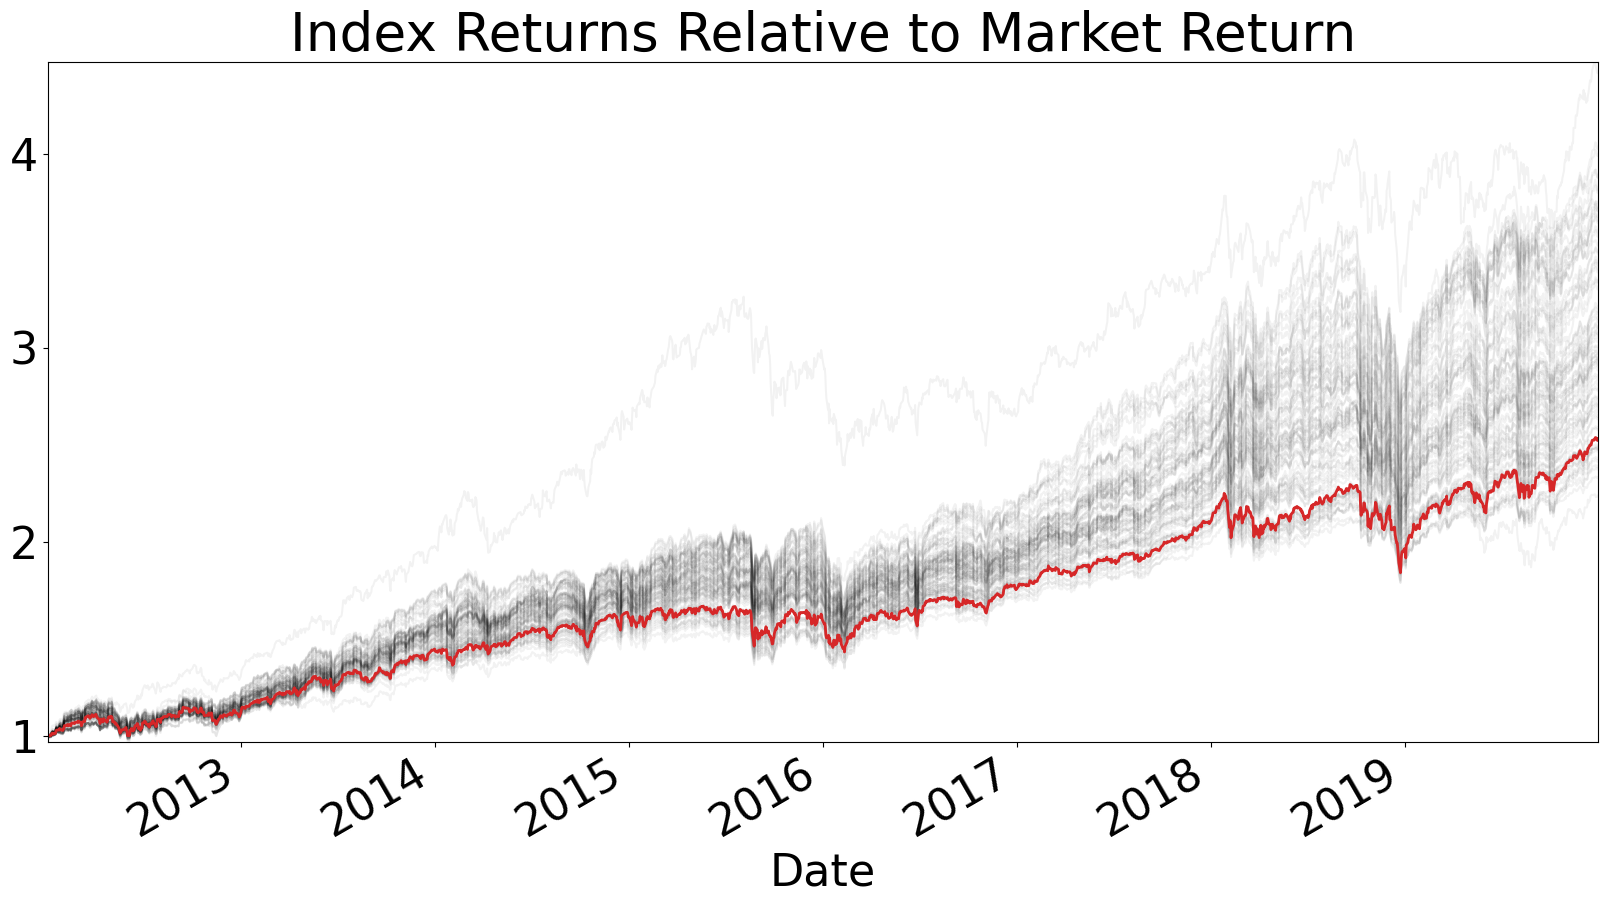

In [63]:
norm_data = close_data.loc["2012":].div(close_data.loc["01-03-2012"]).dropna(axis = 1)
fig, ax = plt.subplots(figsize = (20,10))
norm_data.plot.line(legend = False, color = "k", alpha = .05, ax = ax)
norm_data["S&P 500"].plot.line(color = "C3", linewidth = 2, ax = ax)
ax.set_title("Index Returns Relative to Market Return")

## Hypothesis Test
### One Sample T Test

$$t=\frac{\bar{X} - \mu}{\frac{s}{\sqrt{n}}}$$

$H_0: \bar{X} = \mu$

$H_a: \bar{X} \ne \mu$

$\mu = 0$

In [69]:
means = monthly_returns.mean()
ses = monthly_returns.sem()
means, ses

(Ticker
 AFMFX      0.008467
 AGTHX      0.008708
 AIVSX      0.007065
 AKRIX      0.012940
 AKRSX      0.014000
              ...   
 TWCUX      0.009303
 VAFAX      0.007559
 VWNFX      0.008301
 VWUSX      0.006566
 S&P 500    0.007061
 Length: 100, dtype: float64,
 Ticker
 AFMFX      0.004773
 AGTHX      0.002203
 AIVSX      0.001983
 AKRIX      0.003033
 AKRSX      0.004678
              ...   
 TWCUX      0.002838
 VAFAX      0.003656
 VWNFX      0.002148
 VWUSX      0.002675
 S&P 500    0.002025
 Length: 100, dtype: float64)

Text(0.5, 1.0, '$H_0: \\bar{X}=0$')

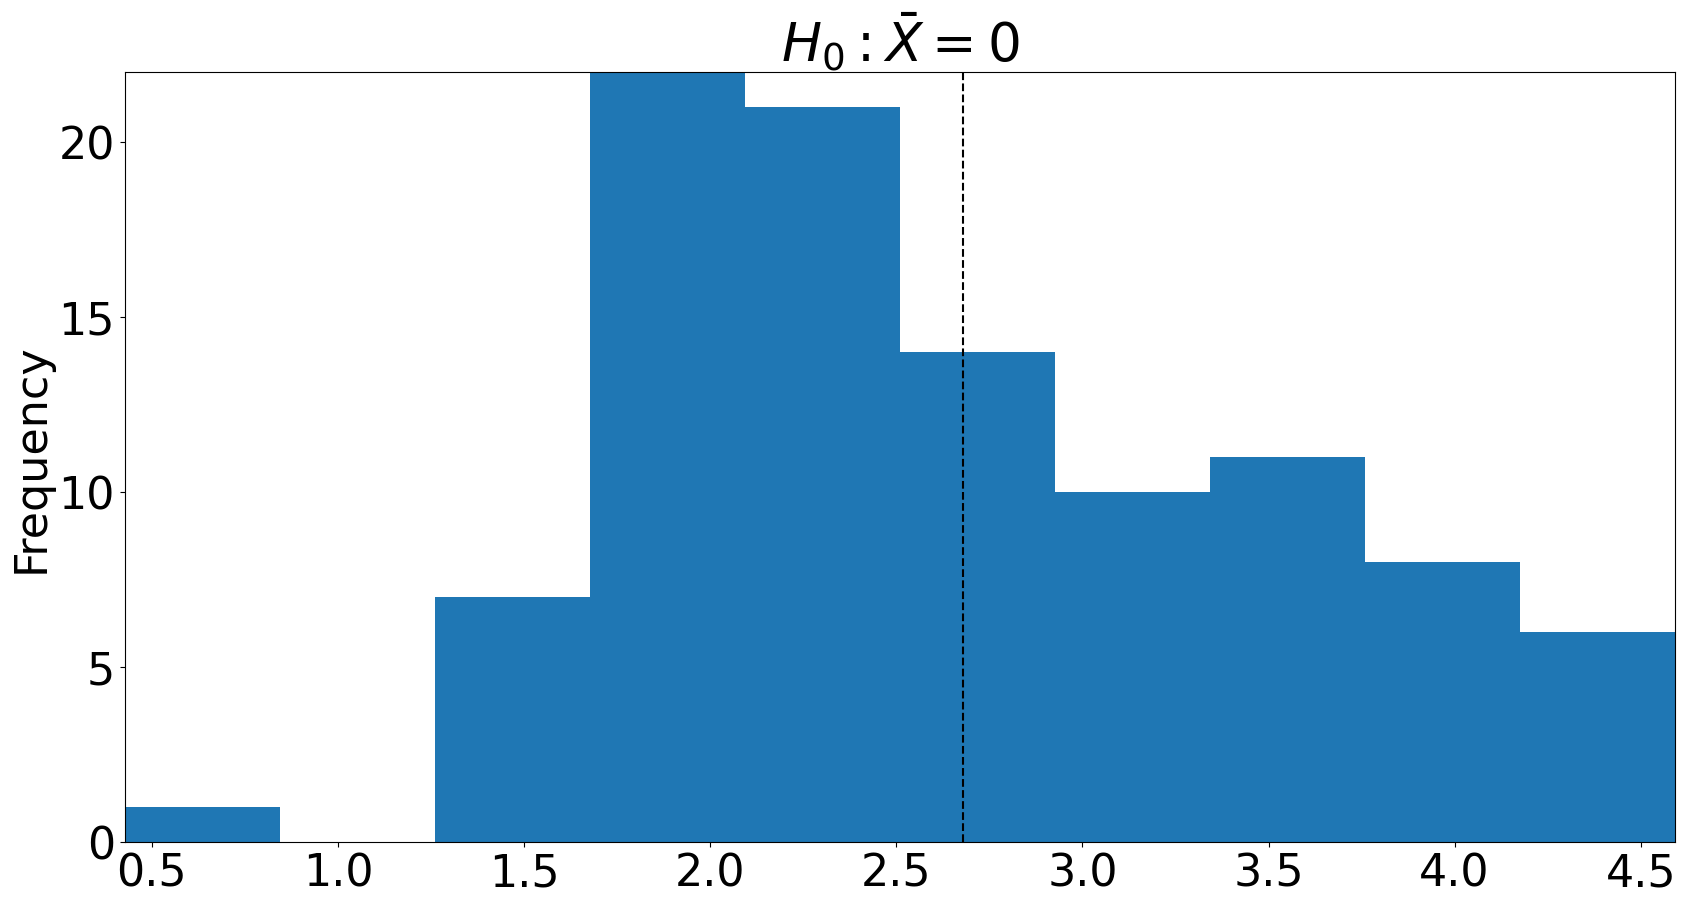

In [72]:
one_sample_test = means.div(ses)

fig, ax = plt.subplots(figsize = (20,10))
one_sample_test.plot.hist(ax = ax)
ax.axvline(one_sample_test.mean(), color = "k", ls = "--")
ax.set_title("$H_0: \\bar{X}=0$")

### Two Sample T Test

$$t = \frac{(\bar{X_1} - \bar{X_2})}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

In [73]:
sn = monthly_returns.std().div(monthly_returns.shape[0])

two_sample_test = means.sub(means["S&P 500"]).div(sn.add(sn["S&P 500"]).pow(.5))
two_sample_test

Ticker
AFMFX      0.114310
AGTHX      0.118564
AIVSX      0.000299
AKRIX      0.460881
AKRSX      0.545260
             ...   
TWCUX      0.151500
VAFAX      0.035841
VWNFX      0.091512
VWUSX     -0.033871
S&P 500    0.000000
Length: 100, dtype: float64

Text(0.5, 0, 't-value')

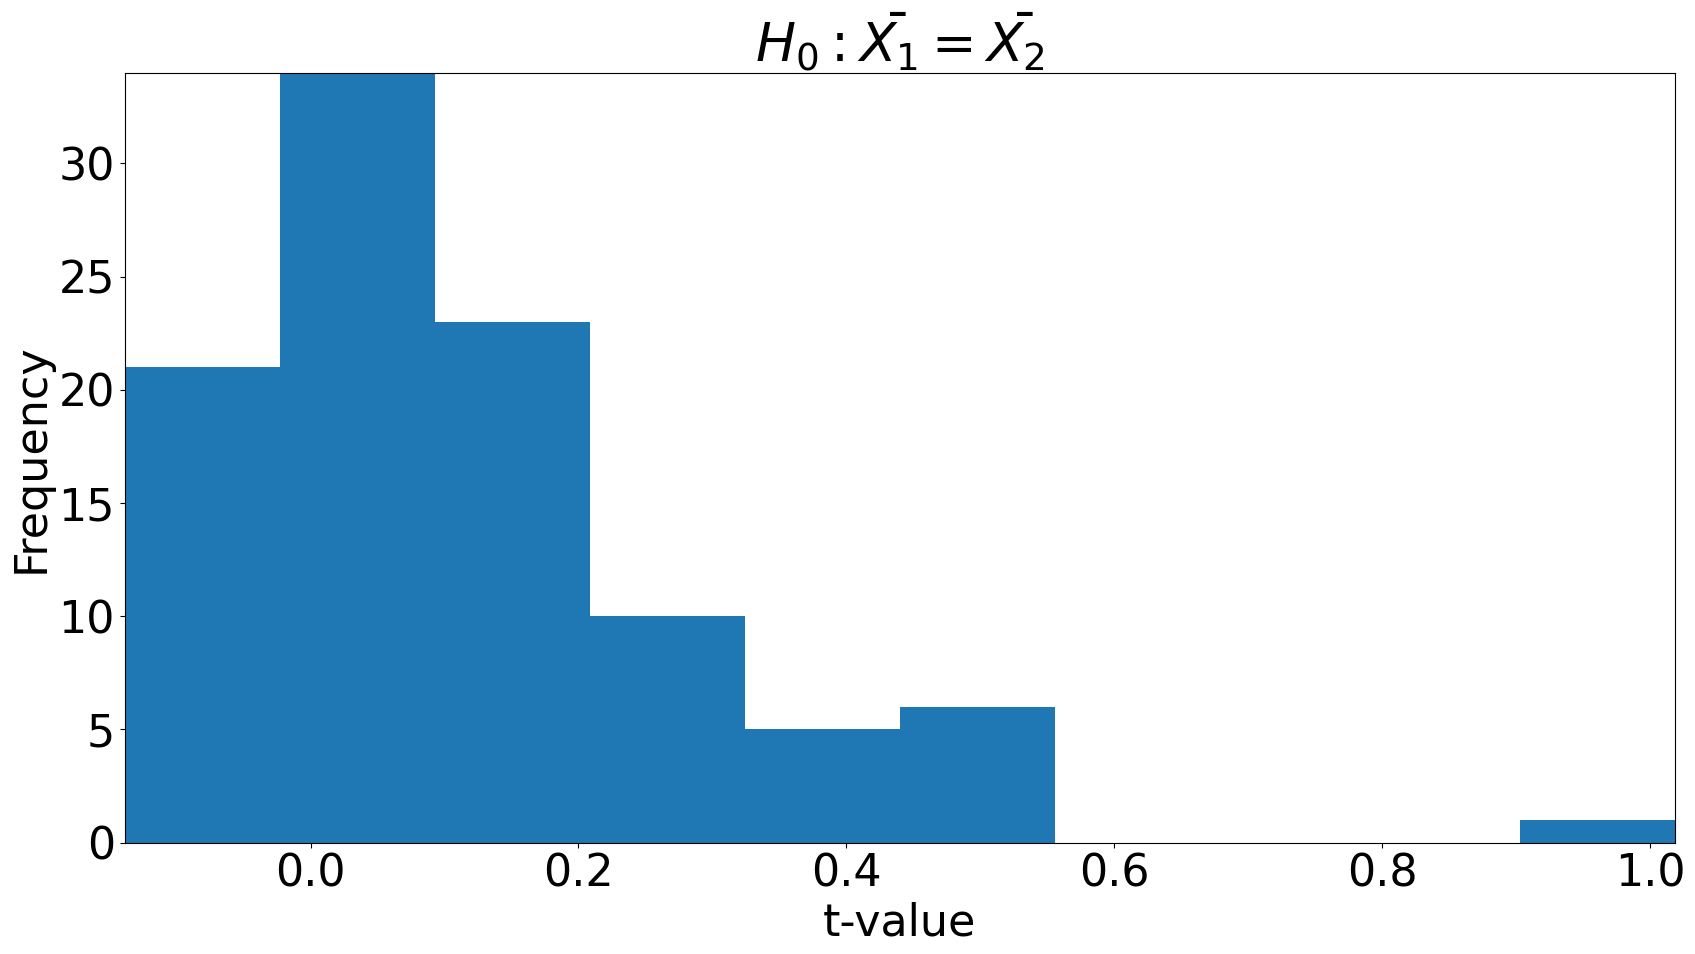

In [74]:
fig, ax = plt.subplots(figsize = (20,10))
two_sample_test.plot.hist(ax = ax)
ax.set_title("$H_0: \\bar{X_1}=\\bar{X_2}$")
ax.set_xlabel("t-value")